# Task One 

## Simple Techniques:

* Max Voting
* Averaging
* Weighted Average

## Advanced Techniques:
* Bagging (Bootstrap AGGregatING)
* Boosting
* Stacking

In [ ]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()

X, y = wine.data[:, 11:13], wine.target

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(X,y)

1.0

In [ ]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator = clf, max_samples = 0.1, max_features = 0.5, n_estimators = 10)

# we are using 10% of samples and 10% of features for each of the 10 estimators

In [ ]:
bg.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
bg.score(X, y)

0.8876404494382022

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


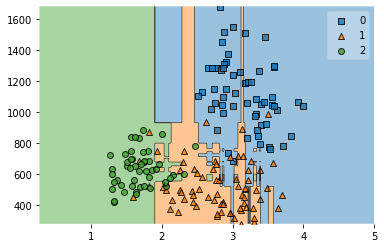

In [ ]:
# Plotting decision regions based on out train, test data as well as the classifier that we used

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, bg)

# Task Two

## Bagging algorithms:

* Bagging meta-estimator
* Random forest

In [ ]:
# Bagging meta estimator can be used for both classification and regression problems
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)

In [ ]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X, y)

0.9943820224719101

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


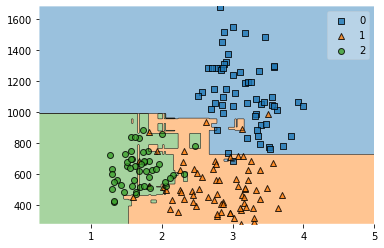

In [ ]:
# Checking the decision regions

plot_decision_regions(X, y, rf)

# Task Three

n_estimator =  1
0.601123595505618


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


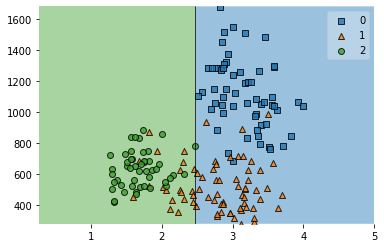

n_estimator =  2
0.7303370786516854


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


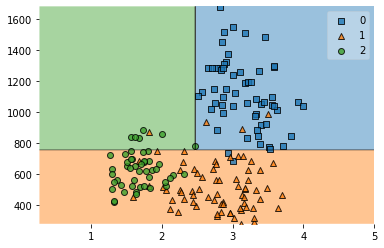

n_estimator =  5
0.8595505617977528


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


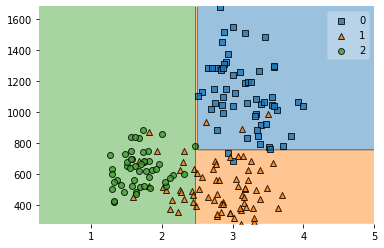

n_estimator =  10
0.8595505617977528


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


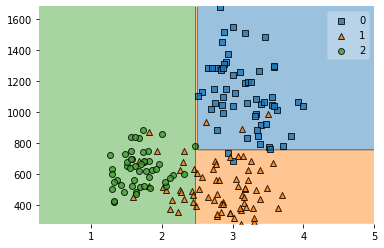

In [ ]:
# Now we will try modeling the data using BOOSTING
# Boosting handles the bias-variance trade-off much better
# Boosting can give better results than bagging but it also tends to overfit the data
# Boosting takes a bunch of weak learners and uses them iteratively to produce results 
# One of the most common boosting algorithms is ADABOOST (Adaptive Boosting)

from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt


#build a weak learner example:DCT (we can also use other weak learners with the condition that they should be able to accept training data as thier parameters )
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

n_est = [1, 2, 5, 10]

for num_est in n_est:
  clf_ada = AdaBoostClassifier(clf, n_estimators = num_est)
  clf_ada.fit(X, y)
  print("n_estimator = ", num_est)
  print(clf_ada.score(X, y))
  plot_decision_regions(X, y, clf_ada)
  plt.show()

# Task Four

## Boosting algorithms:

* AdaBoost : Adaptive boosting
* GBM : Gradient Boosting
* XGBM : Extreme Gradient Boosting
* Light GBM
* CatBoost

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)

model1.score(X_test, y_test)

0.7777777777777778

In [ ]:
import xgboost as xgb

model2 = xgb.XGBClassifier()

model2.fit(X_train, y_train)

model2.score(X_test, y_test)

0.8333333333333334

# Task Five

## Ensemble Learning:
* Homogeneous ensemble methods : Bagging , Boosting
* Heterogeneous ensemble methods: Stacking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = LogisticRegression()

clf_stacking = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=clf4)

Accuracy 0.6296296296296297


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


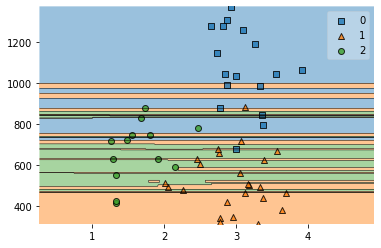

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Accuracy 0.9074074074074074


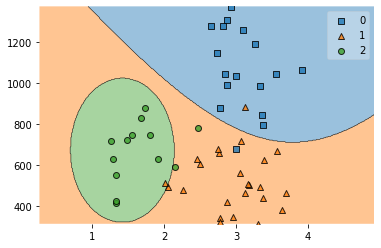

Accuracy 0.8888888888888888


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


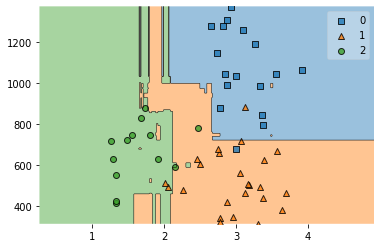

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Accuracy 0.9074074074074074


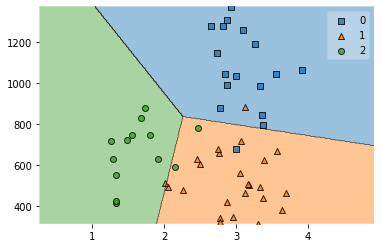

Accuracy 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


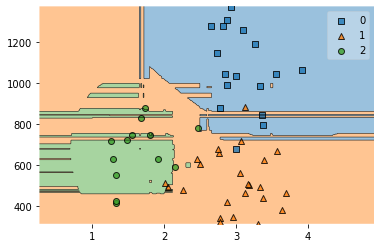

In [ ]:
clfs = [clf1, clf2, clf3, clf4, clf_stacking]

for classifier in clfs:
  classifier.fit(X_train, y_train)
  print('Accuracy', classifier.score(X_test, y_test))

  plot_decision_regions(X_test, y_test, classifier)
  plt.show()